# Investigation of Anxiety Through Scototaxis for Males and Females of Different Size Classes and Environments
###Ana Espinosa (ake524)

In [57]:
# So I can have multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [42]:
#importing necessary packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing my dataset
scototaxis = pd.read_excel("FS_Scototaxis.xlsx")

This dataset contains information on male and female swordtail fish concerning their behavior during a scotaxis assay. A scototaxis assay measures the anxiety behaviors of a fish by making one side of the tank black and the other side white. The fish displaying more anxious behavior will spend more time in the black side. There are 11 columns and 50 rows. Each row represents a different fish. The 11 variables consist of the treatment group each fish belonged to (trt), the names of each fish, their sex, mean velocity, min acceleration, max acceleration,the duration of each fish in the black side of the tank (%), an extraneous column called "mistake", the time the fish spent on the black edge of the tank (%), the time the fish spent on the white side of the tank (%), and the total amount of time the fish was recorded for (sec). Only the variables 'trt', 'Sex', and 'per_cum_dur_black_side' dont have any missing data from either the female or male fish. 

In [15]:
#gives rows and columns
scototaxis.shape

#displays first couple of rows of dataset
scototaxis.head()

(50, 11)

,trt,names,Sex,mean_velocity,min_acc,max_acc,per_cum_dur_black_side,mistake,per_cum_dur_bedge,per_cum_dur_white_side,total_time
0,FF,Eva,F,3.49393,-39769.7,59035.4,93.37970,16.50650,76.8732,6.62030,604.3020
1,FF,Eska,F,3.18053,-32486.2,45024.7,91.58880,16.08600,75.5028,8.41120,675.1732
2,FF,Eliza,F,3.33723,-39769.7,45024.7,72.25070,16.94800,55.3027,27.74900,765.4385
3,FF,Elena,F,3.72752,-31608.5,47026.3,77.96310,20.92820,57.0349,22.03690,704.2178
4,FF,Elba,F,3.21001,-30637.4,41139.1,90.91965,2.37345,88.5462,9.08035,762.6607


When comparing the percent cummulative duration in the black side of the tank between sexes, the mean for females was 82.49% while the mean for males was 85.58%, therefore males exhibited, on average, more anxious behavior than females. The overall  mean regardless of sex is 84.03%.

In [68]:
#mean of time spent in black side (%)
np.mean(scototaxis.per_cum_dur_black_side)

#comparing time spent of black side by sex
scototaxis.filter(['per_cum_dur_black_side', 'Sex']) \
.groupby('Sex') \
.agg(['mean','std'])
     

84.0333710074

per_cum_dur_black_side           
                      mean        std
Sex                                  
F                82.489718   8.067851
M                85.577024  14.187952

There are 5 different treatment groups in this dataset. For males, their group depends on their size and they can either be small (SS), intermediate (INT), or large (LL). Females are assigned groups based on the fish they were enclosed with- either with the three classes of males, with both large and small males (LS), or only other females (FF). There are not equal numbers of datapoints for each treatment group with INT having 13, SS-13, LL-12, FF-9, and LS-3. The pie chart visualizes the counts for this categorical variable.

INT    13
SS     13
LL     12
FF      9
LS      3
Name: trt, dtype: int64

(-1.109697898671973,
 1.1004618046986654,
 -1.1150219070047875,
 1.1076341685575977)

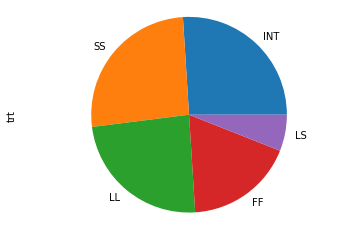

In [39]:
#gives the number of counts for each treatment group. 
scototaxis.trt.value_counts()

# creates pie chart to display proportions
scototaxis['trt'].value_counts() \
.plot(kind = "pie") \
.axis('equal') # equal aspect ratio

The time spent in the black side of the tank is not the same for every treatment groups so I decided to display the mean and standard deviation of each one. Treatment group LL spent the most time in the black with a mean of 86.44% and group LS spent the least time in the black with a mean of 76.17%

In [28]:
scototaxis.filter(['per_cum_dur_black_side', 'trt']) \
.groupby( 'trt') \
.agg(['mean','std'])
     

per_cum_dur_black_side           
                      mean        std
trt                                  
FF               83.166337  10.426405
INT              83.775779  11.129103
LL               86.438544  14.716774
LS               76.170238   6.505946
SS               84.485627  10.894313

The mean and standard deviation of percent time spent in black was calculated for each group based on the data from females and males separately. For females, the group that spent the most time in black was the SS group with a mean of 84.97%. For males, the group that spent the most time in black was the LL males with a mean of 87.43%.

In [34]:
#time spent in black for each group for females only
scototaxis.filter(['per_cum_dur_black_side', 'Sex', 'trt']) \
.query('Sex == "F"')\
.groupby('trt') \
.agg(['mean','std'])
     

per_cum_dur_black_side           
                      mean        std
trt                                  
FF               83.166337  10.426405
INT              80.649417   8.219516
LL               84.449933   7.599050
LS               76.170238   6.505946
SS               84.967560   3.477434

In [37]:
#time spent in black for each group for males only
scototaxis.filter(['per_cum_dur_black_side', 'Sex', 'trt']) \
.query('Sex == "M"')\
.groupby('trt') \
.agg(['mean','std'])

per_cum_dur_black_side           
                      mean        std
trt                                  
INT              85.165273  12.385118
LL               87.432850  17.669399
SS               84.184419  14.010075

This scatterplot visualizes the time spent in black for each fish (y-axis), color-coded to display the group they belong to. 

<AxesSubplot:ylabel='per_cum_dur_black_side'>

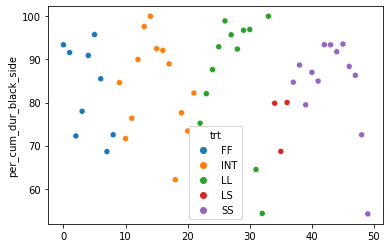

In [67]:
sns.scatterplot( x = scototaxis.index,y =scototaxis['per_cum_dur_black_side'], hue = scototaxis['trt'])